In [ ]:
### Purpose: Plot results of GO-term analysis - Figure S6
## Input: data from GO-term analysis for biological processes (see Methods part of manuscript)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

In [9]:
go_term_list = 'GO_biological_process_all_whippet_CE_prob0.9_dpsi0.1_unique_genes.csv'

In [10]:
#generate the gene list
go_term_df = pd.read_csv(go_term_list)


In [11]:
# Sort go_term_df by 'upload_1 (fold Enrichment)' in descending order
df_sorted = go_term_df.sort_values(by='upload_1 (fold Enrichment)', ascending=False)


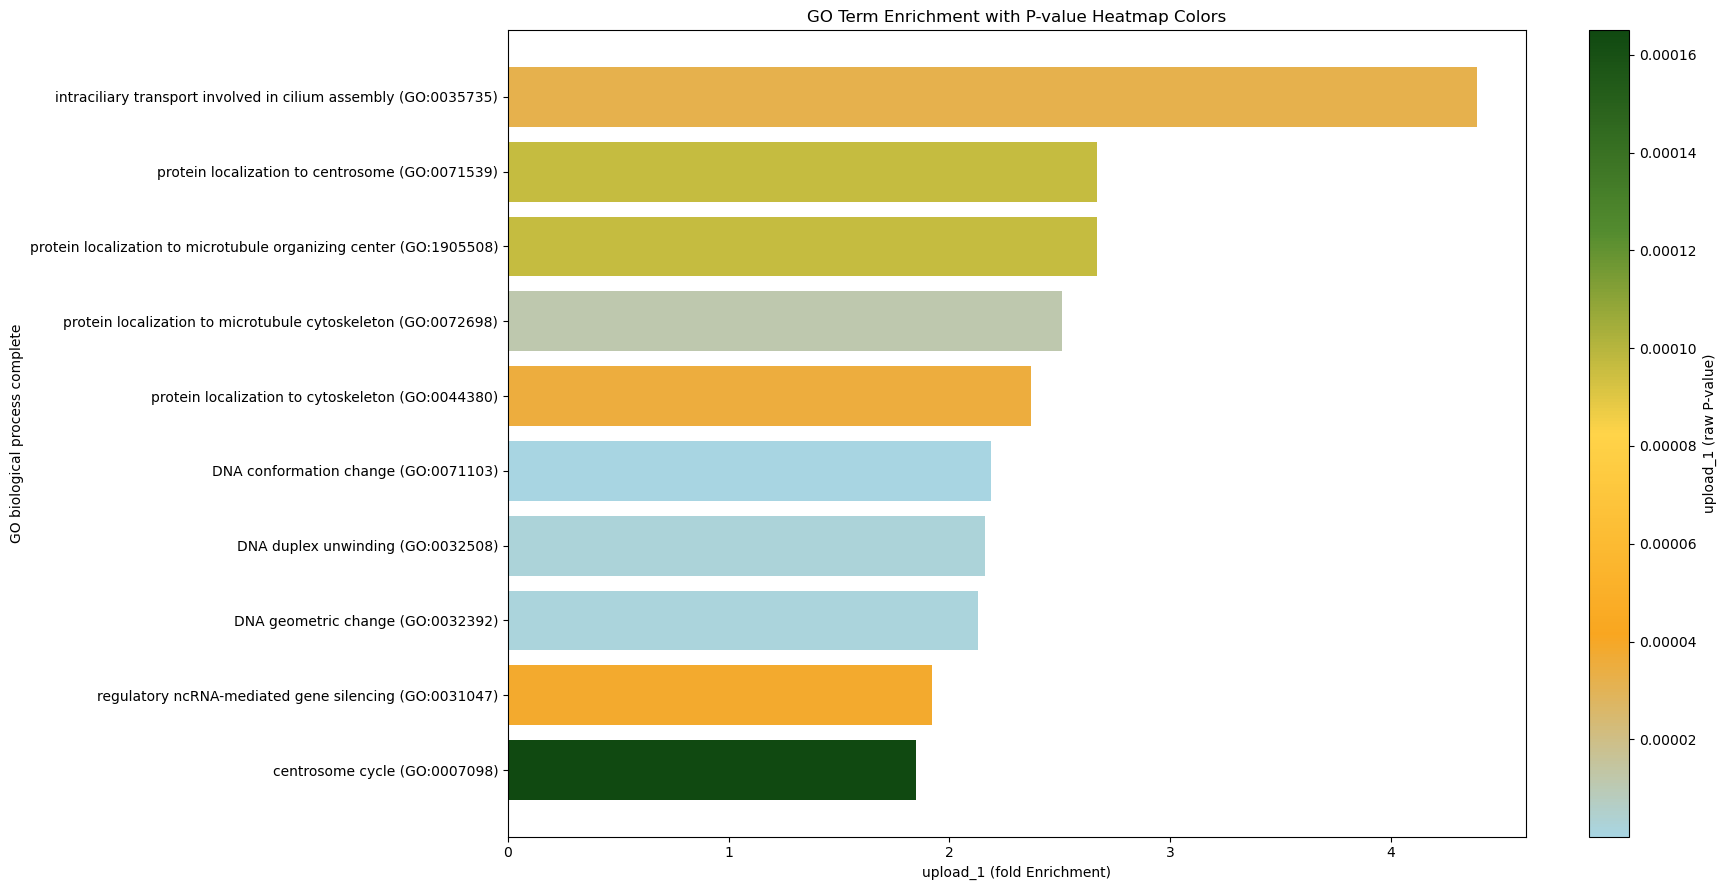

In [12]:
# Define custom color palette
custom_colors = ["#A8D5E2", "#F9A620", "#FFD449", "#548C2F", "#104911"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Select top 10 rows
df_to_plot = df_sorted.head(10)

# Normalize p-values for heatmap coloring
norm = Normalize(vmin=df_to_plot['upload_1 (raw P-value)'].min(), 
                 vmax=df_to_plot['upload_1 (raw P-value)'].max())

# Map colors using the custom colormap based on p-values
heatmap_colors = custom_cmap(norm(df_to_plot['upload_1 (raw P-value)']))

# Create a horizontal bar plot with reversed y-axis
fig, ax = plt.subplots(figsize=(18, 9))
bars = ax.barh(df_to_plot['GO biological process complete'][::-1], 
                df_to_plot['upload_1 (fold Enrichment)'][::-1], 
                color=heatmap_colors[::-1])  # Reverse the order

# Add labels
ax.set_xlabel('upload_1 (fold Enrichment)')
ax.set_ylabel('GO biological process complete')
ax.set_title('GO Term Enrichment with P-value Heatmap Colors')

# Set x-axis limit to start at 0
ax.set_xlim(left=0)

# Add color bar for the heatmap
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.05)
cbar.set_label('upload_1 (raw P-value)')

# Show the plot
plt.tight_layout()
plt.savefig('GO_term_top10_sig_whippet.pdf')
plt.show()

In [15]:
go_term_df_2 = pd.read_csv('GO_term_block_exon_genes.csv')

In [16]:
# Sort go_term_df by 'upload_1 (fold Enrichment)' in descending order
df_sorted2 = go_term_df_2.sort_values(by='upload_1 (fold Enrichment)', ascending=False)

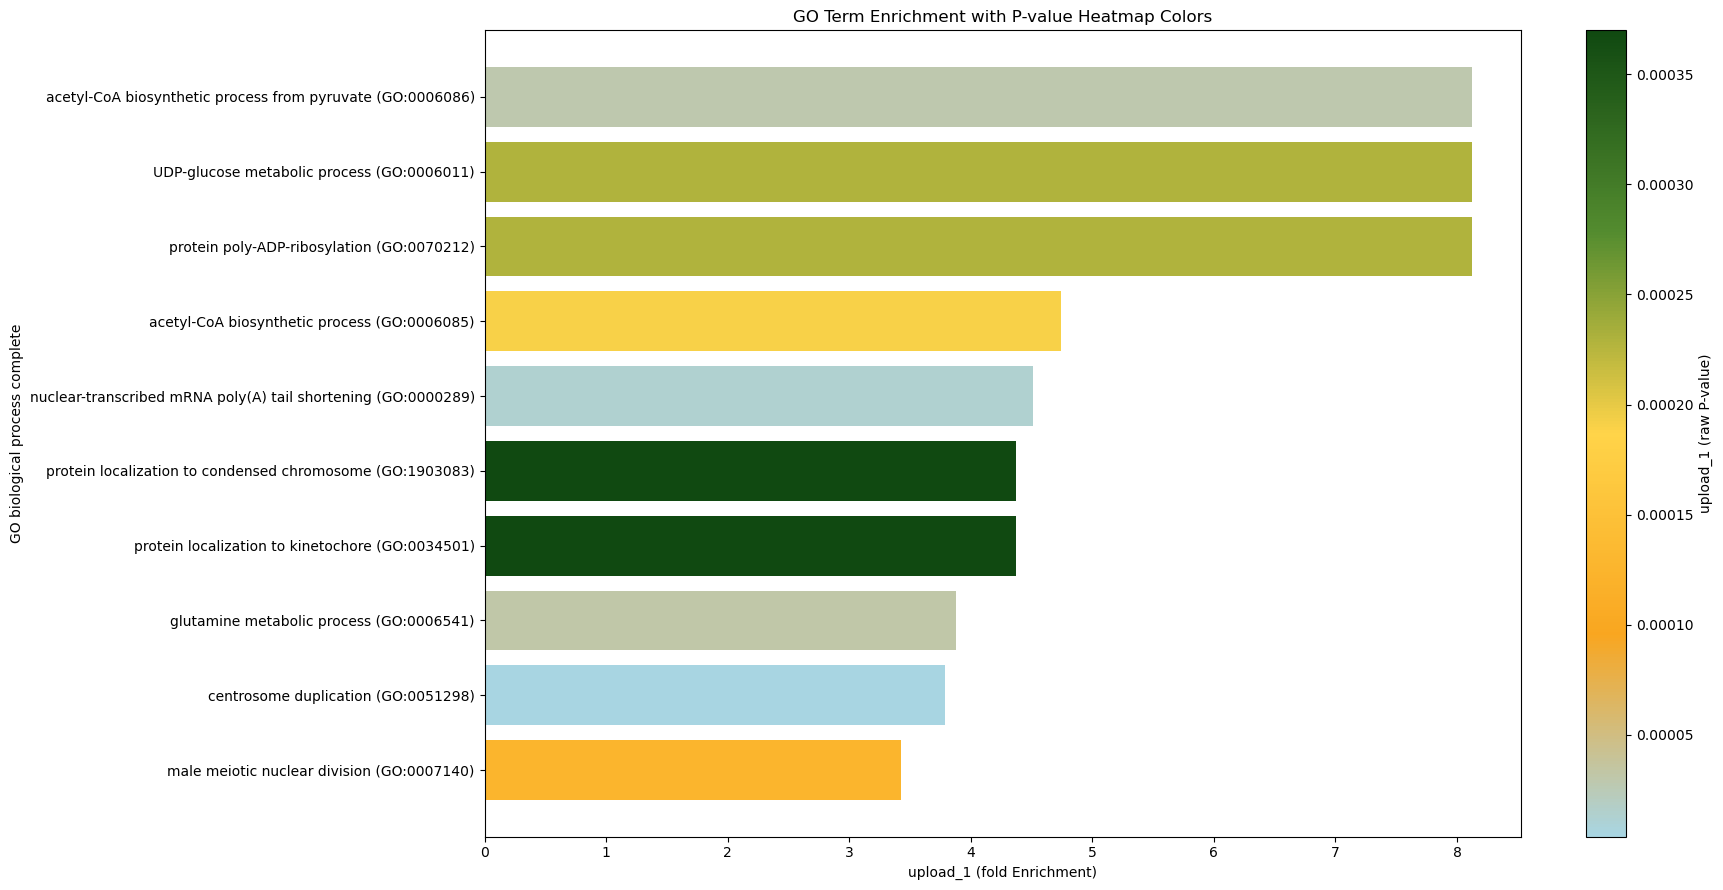

In [17]:
# Select top 10 rows
df2_to_plot = df_sorted2.head(10)

# Normalize p-values for heatmap coloring
norm = Normalize(vmin=df2_to_plot['upload_1 (raw P-value)'].min(), 
                 vmax=df2_to_plot['upload_1 (raw P-value)'].max())

# Map colors using the custom colormap based on p-values
heatmap_colors = custom_cmap(norm(df2_to_plot['upload_1 (raw P-value)']))

# Create a horizontal bar plot with reversed y-axis
fig, ax = plt.subplots(figsize=(18, 9))
bars = ax.barh(df2_to_plot['GO biological process complete'][::-1], 
                df2_to_plot['upload_1 (fold Enrichment)'][::-1], 
                color=heatmap_colors[::-1])  # Reverse the order

# Add labels
ax.set_xlabel('upload_1 (fold Enrichment)')
ax.set_ylabel('GO biological process complete')
ax.set_title('GO Term Enrichment with P-value Heatmap Colors')

# Set x-axis limit to start at 0
ax.set_xlim(left=0)

# Add color bar for the heatmap
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.05)
cbar.set_label('upload_1 (raw P-value)')

# Show the plot
plt.tight_layout()
plt.savefig('20250129_GO_term_top10_block_genes.pdf')
plt.show()